In [1]:
import numpy as np
import pandas as pd

from load_data import load_data
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification
import utils.variables as v

from pyriemann.utils.viz import plot_confusion_matrix


In [2]:
data_type = 'ica'
label_type = 'stai'

train_data, test_data, val_data, train_labels, test_labels, val_labels = load_data(data_type, label_type, epoched = True, binary = True)

ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs: 
 ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016

In [4]:
probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

True
ica
Epoch 1/300

Epoch 1: val_loss improved from inf to 0.65654, saving model to /tmp\checkpoint.h5
207/207 - 8s - loss: 0.5846 - accuracy: 0.6800 - val_loss: 0.6565 - val_accuracy: 0.6900 - 8s/epoch - 40ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.65654
207/207 - 7s - loss: 0.3587 - accuracy: 0.8564 - val_loss: 0.7098 - val_accuracy: 0.6538 - 7s/epoch - 34ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.65654
207/207 - 8s - loss: 0.2485 - accuracy: 0.9183 - val_loss: 0.9208 - val_accuracy: 0.6692 - 8s/epoch - 38ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.65654
207/207 - 8s - loss: 0.2106 - accuracy: 0.9359 - val_loss: 1.0450 - val_accuracy: 0.6562 - 8s/epoch - 37ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.65654
207/207 - 9s - loss: 0.1702 - accuracy: 0.9501 - val_loss: 1.1265 - val_accuracy: 0.6602 - 9s/epoch - 43ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0.65654
207/207 - 9s - loss: 0.1541 - accur

[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[2476  824]
 [2367   33]]
[44.02 51.13  3.85]


<AxesSubplot:title={'center':'Confusion matrix for EEGNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

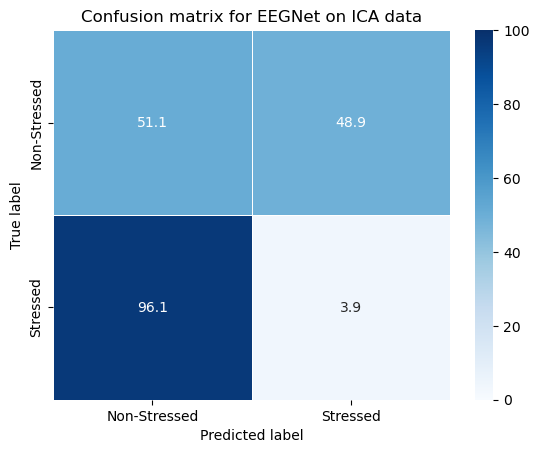

In [12]:
preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)

plot_confusion_matrix(preds_EEGNet, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for EEGNet on ICA data')

In [6]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.99589, saving model to /tmp\checkpoint.h5
413/413 - 68s - loss: 0.9240 - accuracy: 0.7464 - val_loss: 0.9959 - val_accuracy: 0.6892 - 68s/epoch - 165ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.99589
413/413 - 66s - loss: 0.5167 - accuracy: 0.9061 - val_loss: 1.2900 - val_accuracy: 0.6848 - 66s/epoch - 160ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.99589
413/413 - 65s - loss: 0.3682 - accuracy: 0.9383 - val_loss: 1.5275 - val_accuracy: 0.6625 - 65s/epoch - 157ms/step
Epoch 4/300

Epoch 4: val_loss improved from 0.99589 to 0.99567, saving model to /tmp\checkpoint.h5
413/413 - 64s - loss: 0.3479 - accuracy: 0.9420 - val_loss: 0.9957 - val_accuracy: 0.6627 - 64s/epoch - 156ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.99567
413/413 - 65s - loss: 0.2862 - accuracy: 0.9564 - val_loss: 1.5871 - val_accuracy: 0.6515 - 65s/epoch - 158ms/step
Epoch 6/300

Epoch 6: val_loss did not improve fr

[[0.43119222 0.5688078 ]
 [0.67419416 0.32580587]
 [0.39153677 0.60846317]
 ...
 [0.7552755  0.24472453]
 [0.7724776  0.22752233]
 [0.83143944 0.16856062]]
[1 0 1 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[2272 1028]
 [1608  792]]
[53.75 58.56 43.52]


<AxesSubplot:title={'center':'Confusion matrix for TSGL on ICA data'}, xlabel='Predicted label', ylabel='True label'>

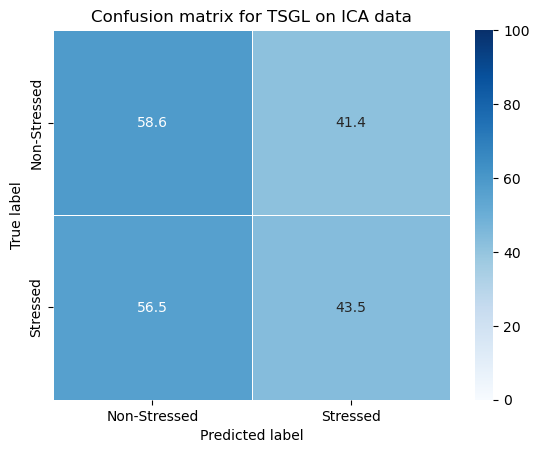

In [13]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

plot_confusion_matrix(preds_TSGL, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for TSGL on ICA data')

In [8]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.63831, saving model to /tmp\checkpoint.h5
413/413 - 21s - loss: 0.3810 - accuracy: 0.8192 - val_loss: 1.6383 - val_accuracy: 0.6617 - 21s/epoch - 50ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 1.63831
413/413 - 18s - loss: 0.0697 - accuracy: 0.9789 - val_loss: 2.0355 - val_accuracy: 0.6875 - 18s/epoch - 44ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 1.63831
413/413 - 19s - loss: 0.0434 - accuracy: 0.9873 - val_loss: 2.8920 - val_accuracy: 0.6904 - 19s/epoch - 45ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.63831
413/413 - 18s - loss: 0.0396 - accuracy: 0.9871 - val_loss: 2.4820 - val_accuracy: 0.7204 - 18s/epoch - 43ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.63831
413/413 - 17s - loss: 0.0329 - accuracy: 0.9883 - val_loss: 1.9143 - val_accuracy: 0.6835 - 17s/epoch - 41ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 1.63831
413/413 - 17s - loss: 0.0238 - acc

[[0.9436807  0.05631756]
 [0.9659392  0.03405956]
 [0.9671538  0.03284499]
 ...
 [0.919286   0.08071029]
 [0.944395   0.05560271]
 [0.9511646  0.0488331 ]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[1234 2066]
 [1635  765]]
[35.07 43.01 27.02]


<AxesSubplot:title={'center':'Confusion matrix for DeepConvNet on New_ICA data'}, xlabel='Predicted label', ylabel='True label'>

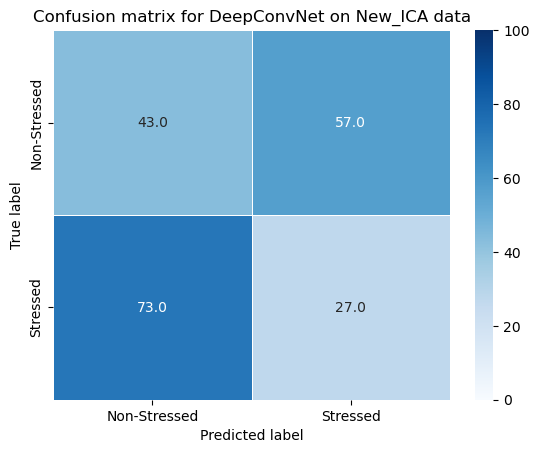

In [9]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)
plot_confusion_matrix(preds_Deep, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for DeepConvNet on New_ICA data')

In [10]:
probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type, epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.02840, saving model to /tmp\checkpoint.h5
413/413 - 11s - loss: 0.2252 - accuracy: 0.9053 - val_loss: 1.0284 - val_accuracy: 0.6737 - 11s/epoch - 28ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 1.02840
413/413 - 10s - loss: 0.0484 - accuracy: 0.9839 - val_loss: 1.2406 - val_accuracy: 0.7281 - 10s/epoch - 25ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 1.02840
413/413 - 10s - loss: 0.0095 - accuracy: 0.9977 - val_loss: 1.5280 - val_accuracy: 0.7190 - 10s/epoch - 25ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.02840
413/413 - 10s - loss: 0.0084 - accuracy: 0.9980 - val_loss: 1.4683 - val_accuracy: 0.6829 - 10s/epoch - 25ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.02840
413/413 - 11s - loss: 0.0076 - accuracy: 0.9976 - val_loss: 2.0300 - val_accuracy: 0.7033 - 11s/epoch - 26ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 1.02840
413/413 - 11s - loss: 0.0040 - acc

[[0.7731253  0.13813083]
 [0.7301787  0.11612521]
 [0.7701354  0.0596882 ]
 ...
 [0.9902281  0.01274396]
 [0.9435766  0.08014703]
 [0.94646096 0.04191666]]
[0 0 0 ... 0 0 0]
[[1. 1. 1. ... 0. 0. 0.]]

 Confusion matrix:
[[2199 1101]
 [1702  698]]
[50.82 56.37 38.8 ]


<AxesSubplot:title={'center':'Confusion matrix for ShallowConvNet on ICA data'}, xlabel='Predicted label', ylabel='True label'>

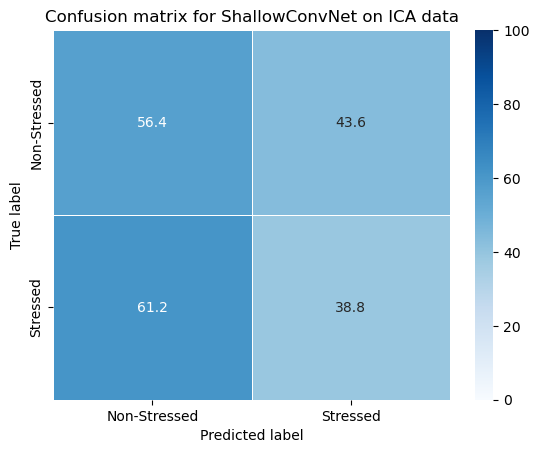

In [14]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

plot_confusion_matrix(preds_Shallow, test_labels, ['Non-Stressed', 'Stressed'], title = 'Confusion matrix for ShallowConvNet on ICA data')